In [1]:
import igraph as ig
import networkx as nx

import leidenalg
import louvain

from datasets import cosnology
from datasets import email_enron
from tqdm import tqdm

SEED = 42

graph = nx.karate_club_graph()
G = ig.Graph.from_networkx(graph)
graph_name = 'karate'


/var/folders/xc/yp5mkx455gq2n2b658qm_3_c0000gn/T/ipykernel_20123/213809013.py:5: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [2]:
resolutions_mod = [0.40 + 0.02 * d for d in range(61)] # 0.40 ... 1.60
resolutions_cpm = [0.04 + 0.02 * d for d in range(48)] # 0.04 ... 0.98

In [3]:
def leiden_fn(*args, **kwargs):
    partition = leidenalg.find_partition(*args, **kwargs)
    return partition

def louvain_fn(*args, **kwargs):
    partition = louvain.find_partition(*args, **kwargs)
    return partition

In [4]:
# Run louvain and leiden algorithms for all resolutions with the Modularity quality function
coms_louvain_mod = list([louvain_fn(G, louvain.RBConfigurationVertexPartition, resolution_parameter=res, seed=SEED) for res in tqdm(resolutions_mod, desc="Louvain Modularity")])
coms_leiden_mod  = list([leiden_fn(G, leidenalg.RBConfigurationVertexPartition, resolution_parameter=res, seed=SEED) for res in tqdm(resolutions_mod, desc="Leiden Modularity")])

Leiden Modularity: 100%|██████████| 61/61 [00:00<00:00, 1185.62it/s]


In [5]:
# Run louvain and leiden algorithms for all resolutions with the CPM quality function
coms_louvain_cpm = list([louvain_fn(G, louvain.CPMVertexPartition, resolution_parameter=res, seed=SEED) for res in tqdm(resolutions_cpm, desc="Louvain Modularity")])
coms_leiden_cpm  = list([leiden_fn(G, leidenalg.CPMVertexPartition, resolution_parameter=res, seed=SEED) for res in tqdm(resolutions_cpm, desc="Leiden Modularity")])

Leiden Modularity: 100%|██████████| 48/48 [00:00<00:00, 1202.65it/s]


In [6]:
mod_louvain_mod = [com.modularity for com in coms_louvain_mod]
mod_leiden_mod = [com.modularity for com in coms_leiden_mod]
mod_louvain_cpm = [com.modularity for com in coms_louvain_cpm]
mod_leiden_cpm = [com.modularity for com in coms_leiden_cpm]

In [7]:
from numpy import argmax
idx_louvain_mod = argmax(mod_louvain_mod)
idx_leiden_mod  = argmax(mod_leiden_mod)
idx_louvain_cpm = argmax(mod_louvain_cpm)
idx_leiden_cpm  = argmax(mod_leiden_cpm)

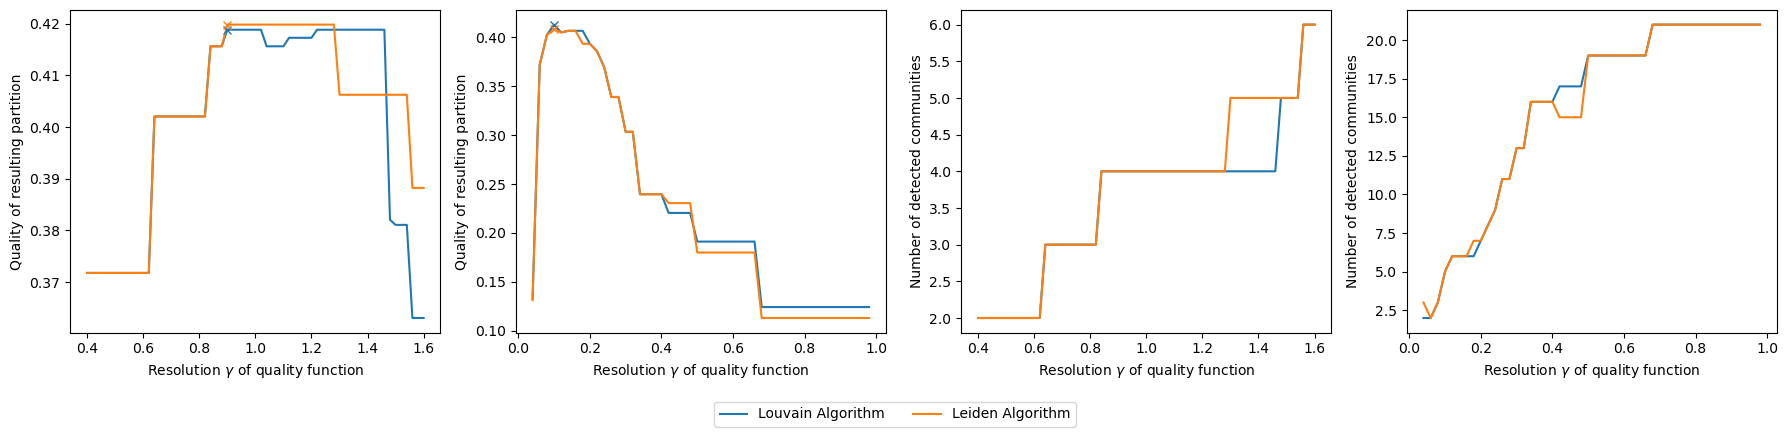

In [15]:
import matplotlib.pyplot as plt
# Set up two graphs, side by side, to plot the results in
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))
ax2.yaxis.set_tick_params(labelbottom=True)

## Left graph, for modularity
# ax1.set_title("Modularity")
ax1.set_xlabel('Resolution $γ$ of quality function')
ax1.set_ylabel('Quality of resulting partition')

## Right graph, for CPM
# ax2.set_title("CPM")
ax2.set_xlabel('Resolution $γ$ of quality function')
ax2.set_ylabel('Quality of resulting partition')

# Draw the results for the modularity quality function
## Plot the modularity determined
ln_mod_louvain_mod, = ax1.plot(resolutions_mod, mod_louvain_mod, label='Quality Louvain')
ln_mod_leiden_mod,  = ax1.plot(resolutions_mod, mod_leiden_mod,  label='Quality Leiden')

## Draw the x marks where maximum quality is attained
ax1.set_prop_cycle(None)
ax1.plot(resolutions_mod[idx_louvain_mod], mod_louvain_mod[idx_louvain_mod], 'x')
ax1.plot(resolutions_mod[idx_leiden_mod],  mod_leiden_mod[idx_leiden_mod],   'x')

# Draw the results for the CPM quality function
## Plot the modularity determined
ln_mod_louvain_cpm, = ax2.plot(resolutions_cpm, mod_louvain_cpm, label='Louvain CPM')
ln_mod_leiden_cpm,  = ax2.plot(resolutions_cpm, mod_leiden_cpm,  label='Leiden CPM')

## Draw the x marks where maximum quality is attained
ax2.set_prop_cycle(None)
ax2.plot(resolutions_cpm[idx_louvain_cpm], mod_louvain_cpm[idx_louvain_cpm], 'x')
ax2.plot(resolutions_cpm[idx_leiden_cpm],  mod_leiden_cpm[idx_leiden_cpm],   'x')


## Left graph, for modularity
# ax3.set_title("Modularity")
ax3.set_xlabel('Resolution $γ$ of quality function')
ax3.set_ylabel('Number of detected communities')

## Plot the number of found communities
ln_cnt_louvain_mod, = ax3.plot(resolutions_mod, list(map(len, coms_louvain_mod)), label='Community count Louvain')
ln_cnt_leiden_mod,  = ax3.plot(resolutions_mod, list(map(len, coms_leiden_mod)), label='Community count Leiden')



## Right graph, for CPM
# ax4.set_title("CPM")
ax4.set_xlabel('Resolution $γ$ of quality function')
ax4.set_ylabel('Number of detected communities')

## Plot the number of found communities
ln_cnt_louvain_cpm, = ax4.plot(resolutions_cpm, list(map(len, coms_louvain_cpm)), label='Community count')
ln_cnt_leiden_cpm,  = ax4.plot(resolutions_cpm, list(map(len, coms_leiden_cpm)), label='Community count')

# Put a legend there
lgd = fig.legend(["Louvain Algorithm", "Leiden Algorithm"], ncol=2,
                 loc='upper center', bbox_to_anchor=(0.5, 0.0))

# Draw the plot
fig.tight_layout()
# fig.subplots_adjust(wspace=0.4)
plt.show()
fig.savefig(f"figures/{graph_name}.png")